<a href="https://colab.research.google.com/github/muchaimaryanne/Machine-Learning-API-using-FastAPI/blob/main/Machine_Learning_API_using_FastAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**



In this project, we aim to create an API that can be requested to interact with a ML model. This is an interesting solution when you want to keep your model architecture secret or to make your model available to users already having an API. By creating an API, and deploying it, your model can so that receive request using the internet protocol as presented by the illustration below.

Sepsis is an infection of the blood stream resulting in a cluster of symptoms such as drop in a blood pressure, increase in heart rate and fever.

The model that we will build will be able to determine the prescence or abscence of Sepsis.




# Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [51]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning libraries and metrics
# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Other packages
import pickle
from sklearn.pipeline import Pipeline



In [52]:
# # Columns to ignore
# to_ignore_cols = [
#     "id", # ID
    
# ]

# Data Loading

Here is the section to load the datasets (train, eval, test) and the additional files

In [53]:
train_url = 'https://drive.google.com/file/d/1D_0MXHhkZKdbU38V9hbRRCPMwVI-_0ZZ/view?usp=drive_link'
train_url = 'https://drive.google.com/uc?id=' + train_url.split('/')[-2]

In [54]:
test_url = 'https://drive.google.com/file/d/1M1kN1YBM8EA_tBIHCNnsVVswDetGQaFs/view?usp=drive_link'
test_url = 'https://drive.google.com/uc?id=' + test_url.split('/')[-2]

In [55]:
# Data loading
sepsis_train_df = pd.read_csv(train_url)
sepsis_test_df = pd.read_csv(test_url)

Description of the data columns.

| Column Name | Attribute/Target | Description |
|----------|----------|----------|
| ID   | N/A   | Unique number to represent patient ID   |
| PRG   | Attribute1	   | Plasma glucose   |
|PL	|Attribute 2	|Blood Work Result-1 (mu U/ml)|
|PR	|Attribute 3	|Blood Pressure (mm Hg)|
|SK	|Attribute 4	|Blood Work Result-2 (mm)|
|TS	|Attribute 5	|Blood Work Result-3 (mu U/ml)|
|M11|	Attribute 6	|Body mass index (weight in kg/(height in m)^2|


# Hypothesis

In this section we stated our null and alternate hypothesis as well as the questions that we seek to answer.

**Null Hypothesis:** People with higher Plasma glucose levels are more likely to be septic.

**Alternate Hypothesis:** People with higher Plasma glucose levels are not more likely to be septic.

**Questions**

1.   Does the Plasma Glucose Level determine if a person is septic or not?
2.   What is the effect of blood results from blood work 1,2 and 3 on the probability of being septic?
3.  Who is more likely to be septic: a person with high BP or low BP?
4.  Does having a higher or lower BMI affect chances of being septic?





**Questions**



# Exploratory Data Analysis: EDA
Here is the section to inspect the datasets in depth, present it, make hypotheses and think the cleaning, processing and features creation.

In [56]:
sepsis_train_df.shape

(599, 11)

The data has 599 rows and 11 columns

In [57]:
sepsis_train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [58]:
sepsis_train_df.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


In [59]:
sepsis_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [60]:
sepsis_train_df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [61]:
sepsis_train_df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [62]:
# Check for duplicates
sepsis_train_df.duplicated().sum()

0

# Univariate Data Analysis

Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

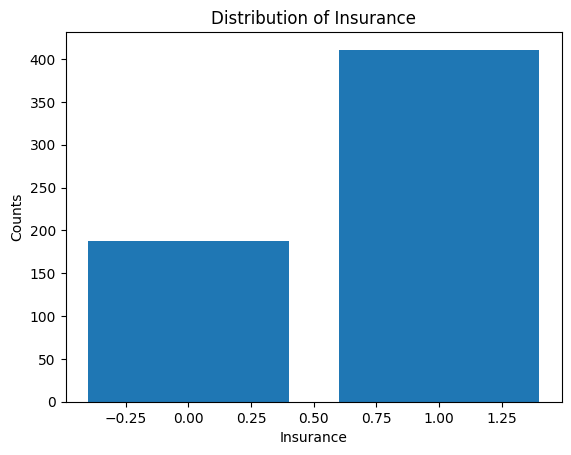

In [63]:
# Distribution of Categorical coulmns
value_counts = sepsis_train_df['Insurance'].value_counts()
plt.bar(value_counts.index, value_counts.values)


plt.xlabel('Insurance')
plt.ylabel('Counts')
plt.title('Distribution of Insurance')

plt.show()

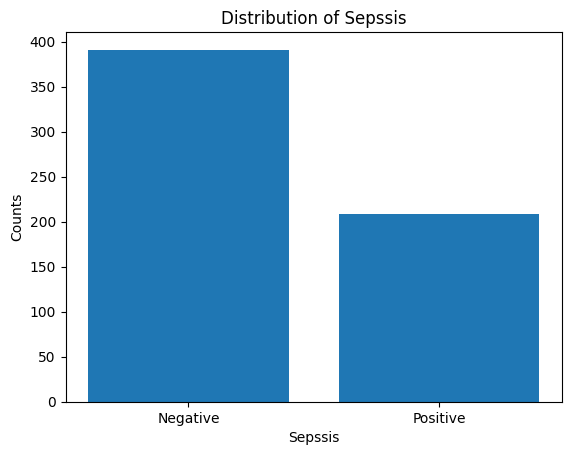

In [64]:
# Distribution of Categorical coulmns
value_counts = sepsis_train_df['Sepssis'].value_counts()
plt.bar(value_counts.index, value_counts.values)


plt.xlabel('Sepssis')
plt.ylabel('Counts')
plt.title('Distribution of Sepssis')

plt.show()

In [65]:
# Understanding the numerical columns further
sepsis_train_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Multi variate Data Analysis

Multivariate analysis is the study of multiple variables in a set of data.

<ipython-input-66-053ed4f0b0fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = sepsis_train_df.corr()


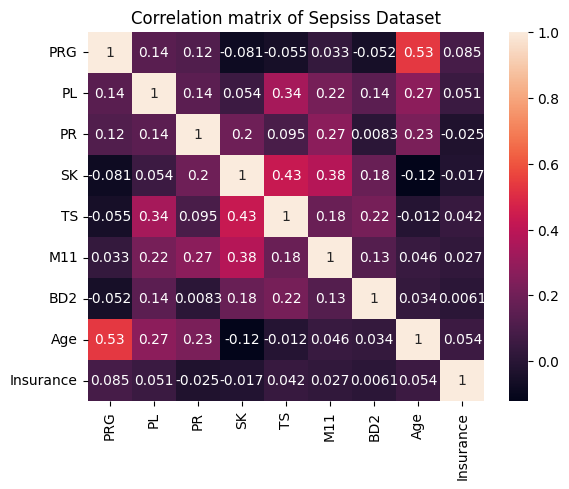

In [66]:
# Finding the correlation among the variables.
correlation = sepsis_train_df.corr()
heatmap = sns.heatmap(correlation, annot = True,annot_kws={'size': 10})
heatmap.set( title = "Correlation matrix of Sepsiss Dataset") 
plt.show ()

**Answering the questions**

1. Does the Plasma Glucose Level determine if a person is septic or not?

In [67]:
PGL = sepsis_train_df.sort_values('PRG', ascending= False).head(50)
PGL


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
159,ICU200169,17,163,72,41,114,40.9,0.817,47,1,Positive
88,ICU200098,15,136,70,32,110,37.1,0.153,43,0,Positive
455,ICU200465,14,175,62,30,0,33.6,0.212,38,1,Positive
298,ICU200308,14,100,78,25,184,36.6,0.412,46,1,Positive
323,ICU200333,13,152,90,33,29,26.8,0.731,43,1,Positive
518,ICU200528,13,76,60,0,0,32.8,0.180,41,1,Negative
72,ICU200082,13,126,90,0,0,43.4,0.583,42,1,Positive
86,ICU200096,13,106,72,54,0,36.6,0.178,45,0,Negative
274,ICU200284,13,106,70,0,0,34.2,0.251,52,1,Negative
357,ICU200367,13,129,0,30,0,39.9,0.569,44,1,Positive


The Plasma Glucose Level alone does not seem to have an effect on a person being septic.

2. What is the effect of blood results from blood work 1,2 and 3 on the probability of being septic?

In [68]:
BR_1 = sepsis_train_df.sort_values('PL', ascending= False).head(50)
BR_1

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
561,ICU200571,0,198,66,32,274,41.3,0.502,28,1,Positive
228,ICU200238,4,197,70,39,744,36.7,2.329,31,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
408,ICU200418,8,197,74,0,0,25.9,1.191,39,1,Positive
579,ICU200589,2,197,70,99,0,34.7,0.575,62,0,Positive
22,ICU200032,7,196,90,0,0,39.8,0.451,41,1,Positive
206,ICU200216,8,196,76,29,280,37.5,0.605,57,0,Positive
359,ICU200369,1,196,76,36,249,36.5,0.875,29,1,Positive
498,ICU200508,7,195,70,33,145,25.1,0.163,55,1,Positive
185,ICU200195,7,194,68,28,0,35.9,0.745,41,0,Positive


In [69]:
BR_1 = sepsis_train_df.sort_values('PL', ascending= False).tail(50)
BR_1

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
490,ICU200500,2,83,65,28,66,36.8,0.629,24,0,Negative
593,ICU200603,2,82,52,22,115,28.5,1.699,25,0,Negative
398,ICU200408,3,82,70,0,0,21.1,0.389,25,0,Negative
450,ICU200460,1,82,64,13,95,21.2,0.415,23,1,Negative
103,ICU200113,1,81,72,18,40,26.6,0.283,24,1,Negative
92,ICU200102,7,81,78,40,48,46.7,0.261,42,1,Negative
210,ICU200220,2,81,60,22,0,27.7,0.290,25,1,Negative
497,ICU200507,2,81,72,15,76,30.1,0.547,25,1,Negative
368,ICU200378,3,81,86,16,66,27.5,0.306,22,0,Negative
494,ICU200504,3,80,0,0,0,0.0,0.174,22,1,Negative


For blood results 1 most but not all of the higher levels registred positive for Sepsis and most but not all of the lower levels registred negative for Sepsis.

In [70]:
BR_2 = sepsis_train_df.sort_values('SK', ascending= False).head(50)
BR_2

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
579,ICU200589,2,197,70,99,0,34.7,0.575,62,0,Positive
445,ICU200455,0,180,78,63,14,59.4,2.420,25,1,Positive
57,ICU200067,0,100,88,60,110,46.8,0.962,31,1,Negative
120,ICU200130,0,162,76,56,100,53.2,0.759,25,1,Positive
86,ICU200096,13,106,72,54,0,36.6,0.178,45,0,Negative
211,ICU200221,0,147,85,54,0,42.8,0.375,24,1,Negative
275,ICU200285,2,100,70,52,57,40.5,0.677,25,1,Negative
532,ICU200542,1,86,66,52,65,41.3,0.917,29,0,Negative
99,ICU200109,1,122,90,51,220,49.7,0.325,31,0,Positive
591,ICU200601,2,112,78,50,140,39.4,0.175,24,0,Negative


In [71]:
BR_2 = sepsis_train_df.sort_values('SK', ascending= False).tail(50)
BR_2

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
337,ICU200347,5,115,76,0,0,31.2,0.343,44,1,Positive
404,ICU200414,5,168,64,0,0,32.9,0.135,41,1,Positive
406,ICU200416,4,115,72,0,0,28.9,0.376,46,1,Positive
407,ICU200417,0,101,62,0,0,21.9,0.336,25,1,Negative
408,ICU200418,8,197,74,0,0,25.9,1.191,39,1,Positive
418,ICU200428,1,83,68,0,0,18.2,0.624,27,1,Negative
426,ICU200436,0,94,0,0,0,0.0,0.256,25,0,Negative
430,ICU200440,2,99,0,0,0,22.2,0.108,23,0,Negative
433,ICU200443,2,139,75,0,0,25.6,0.167,29,0,Negative
435,ICU200445,0,141,0,0,0,42.4,0.205,29,1,Positive


For blood work 2 there is no clear relationship between having a higher or lower result and having sepsiss.




In [72]:
BR_3 = sepsis_train_df.sort_values('TS', ascending= False).head(50)
BR_3

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
13,ICU200023,1,189,60,23,846,30.1,0.398,59,1,Positive
228,ICU200238,4,197,70,39,744,36.7,2.329,31,1,Negative
247,ICU200257,0,165,90,33,680,52.3,0.427,23,1,Negative
584,ICU200594,8,124,76,24,600,28.7,0.687,52,1,Positive
409,ICU200419,1,172,68,49,579,42.4,0.702,28,1,Positive
286,ICU200296,5,155,84,44,545,38.7,0.619,34,0,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
186,ICU200196,8,181,68,36,495,30.1,0.615,60,0,Positive
111,ICU200121,8,155,62,26,495,34.0,0.543,46,1,Positive
153,ICU200163,1,153,82,42,485,40.6,0.687,23,0,Negative


In [73]:
BR_3 = sepsis_train_df.sort_values('TS', ascending= False).tail(50)
BR_3

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
283,ICU200293,7,161,86,0,0,30.4,0.165,47,0,Positive
278,ICU200288,5,114,74,0,0,24.9,0.744,57,1,Negative
193,ICU200203,11,135,0,0,0,52.3,0.578,40,1,Positive
276,ICU200286,7,106,60,24,0,26.5,0.296,29,1,Positive
237,ICU200247,0,179,90,27,0,44.1,0.686,23,0,Positive
235,ICU200245,4,171,72,0,0,43.6,0.479,26,0,Positive
233,ICU200243,4,122,68,0,0,35.0,0.394,29,0,Negative
230,ICU200240,4,142,86,0,0,44.0,0.645,22,0,Positive
227,ICU200237,3,162,52,38,0,37.2,0.652,24,1,Positive
226,ICU200236,0,101,76,0,0,35.7,0.198,26,1,Negative


For blood work 3 there is also no clear relationship between having a high or low result and being septic.

3. Who is more likely to be septic: a person with high BP or low BP?

In [74]:
BP = sepsis_train_df.sort_values('PR', ascending= False).head(50)
BP

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
106,ICU200116,1,96,122,0,0,22.4,0.207,27,1,Negative
177,ICU200187,0,129,110,46,130,67.1,0.319,26,1,Positive
43,ICU200053,9,171,110,24,240,45.4,0.721,54,1,Positive
549,ICU200559,4,189,110,31,0,28.5,0.680,37,0,Negative
84,ICU200094,5,137,108,0,0,48.8,0.227,37,0,Positive
362,ICU200372,5,103,108,37,0,39.2,0.305,65,1,Negative
207,ICU200217,5,162,104,0,0,37.7,0.151,52,0,Positive
440,ICU200450,0,189,104,25,0,34.3,0.435,41,1,Positive
369,ICU200379,1,133,102,28,140,32.8,0.234,45,1,Positive
379,ICU200389,0,93,100,39,72,43.4,1.021,35,0,Negative


In [75]:
BP = sepsis_train_df.sort_values('PR', ascending= False).tail(50)
BP

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
51,ICU200061,1,101,50,15,36,24.2,0.526,26,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
508,ICU200518,2,84,50,23,76,30.4,0.968,21,1,Negative
243,ICU200253,6,119,50,22,176,27.1,1.318,33,1,Positive
258,ICU200268,1,193,50,16,375,25.9,0.655,24,1,Negative
55,ICU200065,1,73,50,10,0,23.0,0.248,21,0,Negative
294,ICU200304,0,161,50,0,0,21.9,0.254,65,0,Negative
313,ICU200323,3,113,50,10,85,29.5,0.626,25,1,Negative
356,ICU200366,1,125,50,40,167,33.3,0.962,28,1,Positive
97,ICU200107,1,71,48,18,76,20.4,0.323,22,1,Negative


The blood pressure of the patient does not seem to affect likelihood of having sepsiss.

4. Does having a higher or lower BMI affect chances of being septic?

In [76]:
BMI = sepsis_train_df.sort_values('M11', ascending= False).head(50)
BMI

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
177,ICU200187,0,129,110,46,130,67.1,0.319,26,1,Positive
445,ICU200455,0,180,78,63,14,59.4,2.420,25,1,Positive
125,ICU200135,1,88,30,42,99,55.0,0.496,26,1,Positive
120,ICU200130,0,162,76,56,100,53.2,0.759,25,1,Positive
303,ICU200313,5,115,98,0,0,52.9,0.209,28,1,Positive
193,ICU200203,11,135,0,0,0,52.3,0.578,40,1,Positive
247,ICU200257,0,165,90,33,680,52.3,0.427,23,1,Negative
155,ICU200165,7,152,88,44,0,50.0,0.337,36,1,Positive
99,ICU200109,1,122,90,51,220,49.7,0.325,31,0,Positive
84,ICU200094,5,137,108,0,0,48.8,0.227,37,0,Positive


In [77]:
BMI = sepsis_train_df.sort_values('M11', ascending= False).tail(50)
BMI

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
190,ICU200200,3,111,62,0,0,22.6,0.142,21,1,Negative
102,ICU200112,0,125,96,0,0,22.5,0.262,21,1,Negative
585,ICU200595,1,93,56,11,0,22.5,0.417,22,1,Negative
106,ICU200116,1,96,122,0,0,22.4,0.207,27,1,Negative
80,ICU200090,3,113,44,13,0,22.4,0.140,22,1,Negative
385,ICU200395,1,119,54,13,50,22.3,0.205,24,0,Negative
28,ICU200038,13,145,82,19,110,22.2,0.245,57,1,Negative
430,ICU200440,2,99,0,0,0,22.2,0.108,23,0,Negative
393,ICU200403,4,116,72,12,87,22.1,0.463,37,0,Negative
511,ICU200521,0,139,62,17,210,22.1,0.207,21,1,Negative


Having a higher BMI does not seem to necessarily guarantee abscence of sepsiss but having a lower BMI seems to reduce the likelihood of having sepsiss.

# Feature Processing & Engineering

Here is the section to clean, process the dataset and create new features.

In [78]:
# Drop Duplicates.

duplicates = sepsis_train_df.duplicated().sum()
duplicates

0

There are no duplicate rows.

In [79]:
sepsis_train_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [80]:
# Check for the unique values in each column
sepsis_train_df['PRG'].unique()


array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [81]:
sepsis_train_df['PL'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67])

In [82]:
sepsis_train_df['PR'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24])

In [83]:
sepsis_train_df['SK'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [84]:
sepsis_train_df['TS'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25])

In [85]:
sepsis_train_df['M11'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [86]:
sepsis_train_df['BD2'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [87]:
sepsis_train_df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64])

In [88]:
sepsis_train_df['Insurance'].unique()

array([0, 1])

In [89]:
sepsis_train_df['Sepssis'].unique()

array(['Positive', 'Negative'], dtype=object)

# Features Encoding

We will use the OneHot Encoder to encode categorical columns.

In [90]:
sepsis_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [91]:
# Proceeding to encode using OneHotEncoder.
cat_columns = ['Sepssis']

num_columns = ['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance']

In [92]:
cat_encoder= OneHotEncoder(drop="first")

sepssis_encoded_data = cat_encoder.fit_transform(sepsis_train_df[cat_columns])
sepssis_encoded_data

<599x1 sparse matrix of type '<class 'numpy.float64'>'
	with 208 stored elements in Compressed Sparse Row format>

In [93]:
#Converting encoded array to df
sepssis_encoded_df = pd.DataFrame(sepssis_encoded_data.toarray(), columns=cat_encoder.get_feature_names_out(['Sepssis']))

In [94]:
sepssis_encoded_df

,Sepssis_Positive
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
594,0.0
595,1.0
596,0.0
597,0.0


# Feature Scaling

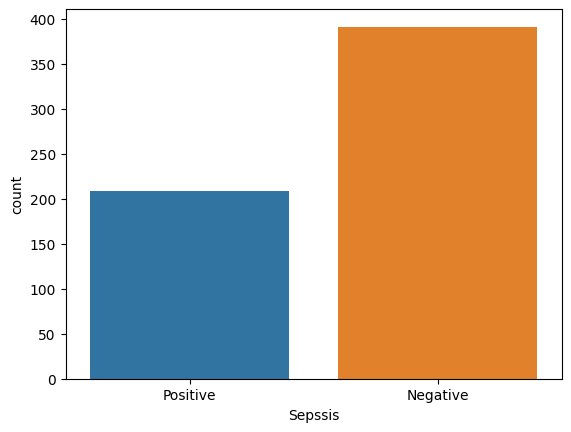

In [95]:
# Showing number of positive and negative patients
sns.countplot(x ='Sepssis', data = sepsis_train_df)
plt.show()

The dataset is imbalanced hence feature scaling is necessary.

In [96]:
# Instanciating the scaler.

scaler = StandardScaler()

In [97]:
# Fitting it to numerical columns.

sepssis_scaled_data = StandardScaler().fit_transform(sepsis_train_df[num_columns])

In [98]:
# Converting the array to a df.

sepssis_scaled_df = pd.DataFrame(sepssis_scaled_data, columns=scaler.get_feature_names_out(['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance']))

In [99]:
sepssis_scaled_df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.209955,0.432333,1.413836,-1.478570
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.664876,-0.386002,-0.193804,-1.478570
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,-1.077297,0.565757,-0.109191,0.676329
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.477412,-0.931558,-1.039930,0.676329
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,1.397227,5.357163,-0.024579,0.676329
...,...,...,...,...,...,...,...,...,...
594,0.647402,0.087166,0.169109,1.526932,1.292417,0.209955,0.746620,0.060034,-1.478570
595,-1.138295,2.077668,0.686720,-0.410054,0.906081,0.009994,0.595406,-0.955317,0.676329
596,-1.138295,-1.627728,0.376154,-1.284822,-0.682191,1.672174,-0.851503,1.075385,0.676329
597,-0.840679,-0.954020,-2.315423,-0.097637,-0.467559,-0.514905,0.230714,-1.039930,-1.478570


In [100]:
#y_encoded

In [101]:
# Concatinating the numerical and categorical columns

sepsis_ready_df = pd.concat([sepssis_scaled_df,sepssis_encoded_df], axis=1)

In [102]:
sepsis_ready_df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis_Positive
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.209955,0.432333,1.413836,-1.478570,1.0
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.664876,-0.386002,-0.193804,-1.478570,0.0
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,-1.077297,0.565757,-0.109191,0.676329,1.0
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.477412,-0.931558,-1.039930,0.676329,0.0
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,1.397227,5.357163,-0.024579,0.676329,1.0
...,...,...,...,...,...,...,...,...,...,...
594,0.647402,0.087166,0.169109,1.526932,1.292417,0.209955,0.746620,0.060034,-1.478570,0.0
595,-1.138295,2.077668,0.686720,-0.410054,0.906081,0.009994,0.595406,-0.955317,0.676329,1.0
596,-1.138295,-1.627728,0.376154,-1.284822,-0.682191,1.672174,-0.851503,1.075385,0.676329,0.0
597,-0.840679,-0.954020,-2.315423,-0.097637,-0.467559,-0.514905,0.230714,-1.039930,-1.478570,0.0


In [103]:
# Encoding the target column using label encoder.

le = LabelEncoder()
target = sepsis_ready_df['Sepssis_Positive']
y_encoded = le.fit_transform(target)

In [104]:
sepsis_ready_df = sepsis_ready_df.drop('Sepssis_Positive', axis=1)

In [105]:
sepsis_ready_df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.209955,0.432333,1.413836,-1.478570
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.664876,-0.386002,-0.193804,-1.478570
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,-1.077297,0.565757,-0.109191,0.676329
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.477412,-0.931558,-1.039930,0.676329
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,1.397227,5.357163,-0.024579,0.676329
...,...,...,...,...,...,...,...,...,...
594,0.647402,0.087166,0.169109,1.526932,1.292417,0.209955,0.746620,0.060034,-1.478570
595,-1.138295,2.077668,0.686720,-0.410054,0.906081,0.009994,0.595406,-0.955317,0.676329
596,-1.138295,-1.627728,0.376154,-1.284822,-0.682191,1.672174,-0.851503,1.075385,0.676329
597,-0.840679,-0.954020,-2.315423,-0.097637,-0.467559,-0.514905,0.230714,-1.039930,-1.478570


In [106]:
sepsis_test_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


In [107]:
# Splitting to train and eval
X = sepsis_ready_df
y = y_encoded


X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [108]:
X_train.shape

(479, 9)

In [109]:
X_eval.shape

(120, 9)

In [110]:
y_train.shape

(479,)

In [111]:
y_eval.shape

(120,)

In [112]:
#test_num_columns = sepsis_test_df['PRG'],['PL'],['PR'],['SK'],['TS'],['M11'],['BD2'],['Age'],['Insurance']

In [113]:
test_sepssis_scaled_data = StandardScaler().fit_transform(sepsis_test_df[num_columns])

In [114]:
# Converting the array to a df.

test_sepssis_scaled_df = pd.DataFrame(test_sepssis_scaled_data, columns=scaler.get_feature_names_out(['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance']))

In [115]:
test_sepssis_scaled_df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,-0.859927,-0.497755,-1.674099,-0.155474,0.353284,-1.232644,-0.104160,-0.613614,0.611542
1,-0.859927,-0.532034,0.907313,-0.091854,-0.733744,-0.693766,-0.127034,-0.787317,0.611542
2,0.613984,-0.943381,-3.635972,-1.300640,-0.733744,-1.151812,-0.813250,-0.439911,0.611542
3,-0.859927,0.016430,0.184518,0.989691,-0.733744,-0.599462,-1.107343,-0.266208,0.611542
4,0.908767,0.907682,0.391030,0.544349,0.407635,0.397463,0.827133,1.818231,-1.635210
...,...,...,...,...,...,...,...,...,...
164,1.793114,-0.771986,0.287774,1.753135,0.896798,0.087608,-0.875337,2.599895,0.611542
165,-0.565145,-0.052128,-0.021995,0.417108,-0.733744,0.613014,-0.323096,-0.526763,0.611542
166,0.319202,-0.086407,0.081261,0.162627,0.280815,-0.815014,-0.633527,-0.266208,0.611542
167,-0.859927,0.084987,-0.538278,-1.300640,-0.733744,-0.289607,-0.293687,1.210269,0.611542


# Modelling

In this section we train, evaluate an test our selected models using our different datasets. We then compare each models peformance.

**Feature Selection**

In [116]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [117]:
# Get the feature importance scores
feature_importances = rf_model.feature_importances_

In [118]:
# Sort the features by importance score
sorted_indices = np.argsort(feature_importances)[::-1]

In [119]:
# Print the feature ranking
print("Feature ranking:")
for i in sorted_indices:
    print(f"{i+1}. Feature {i} ({feature_importances[i]:.4f})")

Feature ranking:
2. Feature 1 (0.2833)
6. Feature 5 (0.1662)
7. Feature 6 (0.1173)
8. Feature 7 (0.1105)
5. Feature 4 (0.0837)
3. Feature 2 (0.0796)
4. Feature 3 (0.0753)
1. Feature 0 (0.0647)
9. Feature 8 (0.0195)


In [120]:
# Select the top k features
k = 10
selected_features = sorted_indices[:k]
selected_features

array([1, 5, 6, 7, 4, 2, 3, 0, 8])

In [121]:
# Train a new classifier using only the selected features
X_train_selected = X_train.iloc[:, selected_features]
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [122]:
# making sure that the test set has the same columns as the training set before slicing it with selected_features
X_eval_selected = X_eval.iloc[:, selected_features]

In [123]:
# using X_eval_selected to make predictions using your trained model:
y_pred = rf_model_selected.predict(X_eval_selected)

In [124]:
#classification report for your model's performance on the test set.
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        78
           1       0.60      0.60      0.60        42

    accuracy                           0.72       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.72      0.72      0.72       120



**Random Forest Classifier**

In [125]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.set_params(**{'n_estimators': 100, 'random_state': 42})

RandomForestClassifier(random_state=42)

In [126]:
# Train the model on the training set
rfc.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [127]:
# Fit the eval set with the same features as train set
X_eval_selected = X_eval.iloc[:, selected_features]
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_eval_selected, y_eval)

RandomForestClassifier(random_state=42)

In [128]:
# Evaluate the Model on the Evaluation dataset 

y_pred = rfc.predict(X_eval_selected)

In [129]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [130]:
# Compute the valid metrics for the use case # Optional: show the classification report 
accuracy = accuracy_score(y_eval, y_pred)
precision = precision_score(y_eval, y_pred)
recall = recall_score(y_eval, y_pred)
f1 = f1_score(y_eval, y_pred)


#classification report for the model's performance on the eval set.
RFCM=(classification_report(y_eval, y_pred))

print(RFCM)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        78
           1       0.60      0.60      0.60        42

    accuracy                           0.72       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.72      0.72      0.72       120



In [131]:
# Fit the test set with the same features as train set
X_test_selected = test_sepssis_scaled_df.iloc[:, selected_features]
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)

In [132]:
y_test_pred = rfc.predict(X_test_selected)

In [133]:
y_test_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

# Export Key Components

In [134]:
# Using pickle to put all our key components in a python dictionary and save it as a file that will be loaded in an app.

pipeline = Pipeline([
    ('encoder', cat_encoder),
    ('scaler', scaler),
    ('model', rfc)
])

In [135]:
#Export the pipeline
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)